### Lab 8 Part

**Terminal Command Used:**

spades.py -o lab8/output -1 /data/Lab8_data/illumina_reads_R1.fastq -2 /data/Lab8_data/illumina_reads_R2.fastq --pacbio /data/Lab8_data/pacbio_reads.fastq -t 1

Meanings of the code:  
1) -o specify the output directory  
2) -1 specify the path to the first Illumina read  
3) -1 specify the path to the second Illumina read  
4) -t 1 make sure the system uses only 1 core rather than all 16 to prevent overload.  

Could not run the SPAdes command until the end. The program stopped around 3 hours after started.   

**Here are the error code:**

< jemalloc>: Error in malloc(): out of memory. Requested: 2981205520, active: 16651386880

== Error ==  system call for: "['/bigdata/home/softwares/SPAdes-3.13.1-Linux/bin/spades-hammer', '/bigdata/home/5485434/lab9/output/corrected/configs/config.info']" finished abnormally, err code: -6

The error is due to the 10G assigned space in the server is not big enough to run the full program. 

**Therefore, I used the data of  pre-assembled genome available at /data/Lab9_data/ for Lab 9 analysis**

**Why do we expect short reads to produce a more fragmented assembly than long reads?**  
The short read length limits its capability to resolve complex regions with repetitive or heterozygous sequences. Therefore, important biological sequences like genes or promoter regions are often highly fragmented using short-read sequencing.  (https://www.genengnews.com/insights/the-long-and-the-short-of-dna-sequencing/)  
**Why does a single-molecule sequencing like PacBio have a higher error rate than Illumina?**  
In general, PacBio has longer reading length than that of Illumina. Although longer reads can construct a more contiguous assembly, it might cause a higher error rate per base pair.

### Lab 9 Part

**Terminal Command:**  
assembly-stats /data/Lab9_data/contigs.fasta  

**Output:**  

stats for /data/Lab9_data/contigs.fasta    
sum = 6680581, n = 180, ave = 37114.34, largest = 687571
N50 = 234690, n = 10
N60 = 202142, n = 13
N70 = 154232, n = 17
N80 = 103366, n = 22
N90 = 81821, n = 29
N100 = 128, n = 180
N_count = 0
Gaps = 0

1) Total length of all contigs : 6680581  
2) The number of contigs : 180  
3) N50 = 234690  

**Terminal Command:**  
assembly-stats /data/Lab9_data/scaffolds.fasta    

stats for /data/Lab9_data/scaffolds.fasta  
sum = 6680345, n = 176, ave = 37956.51, largest = 687571  
N50 = 234690, n = 10  
N60 = 202142, n = 13  
N70 = 154232, n = 17  
N80 = 103366, n = 22  
N90 = 83515, n = 29  
N100 = 129, n = 176  
N_count = 20  
Gaps = 2  

1) Total length of all scaffolds : 6680345  
2) The number of scaffolds : 176  
3) N50 = 234690 


**Why is N50 is useful statistic to calculate?**  
Contig or scaffold N50 is a weighted median statistic such that 50% of the entire assembly is contained in contigs or scaffolds equal to or larger than this value. N50 does a better, though still imperfect, job of avoiding the dangers inherent in relying on the mean length and it normalizes for differences in overall assembly sizes by asking at what contig/scaffold length from a set of sorted scaffold lengths.(http://www.acgt.me/blog/2013/7/8/why-is-n50-used-as-an-assembly-metric.html)

**Why not just list the mean or median contig length?**  
N50 is similar to a mean/median of lengths.  
However, it gives more weight to longer contigs.  

**In your assembly, are scaffolds longer than contigs, or are scaffolds approximately equal to contigs?**   
Scaffolds are only longer than contigs by 236 bps.  
In addition, their equal N50 scores suggests that they are approximately equal.

### Extra Credit

In [11]:
from Bio import SeqIO
contig_coverage = SeqIO.parse(open("contigs.fasta"), "fasta")
header = []
for i in contig_coverage:
    header.append(i.id)
    

In [12]:
coverage = []
for j in header:
    temp = j
    cov = ''
    while not temp[-1] == "_":
        cov = temp[-1] + cov
        length = len(temp)
        cut = length -1
        temp = temp[:cut]
    coverage.append(round(float(cov)))

In [13]:
dict = {}
for k in coverage:
    if k in dict:
        dict[k] += 1
    else:
        dict[k] = 1

def lookup(value, dict):
    m = 0
    if value in dict:
        m = dict[value]
        return m
    return m   

y_axis = []
for x in range(1, 1600): 
    y_axis.append(lookup(x, dict))

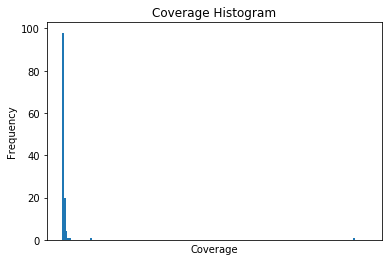

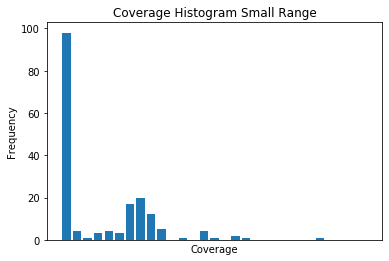

In [14]:
import matplotlib.pyplot as plt

plt.bar(range(1,1600), y_axis,10)
plt.xticks([])
plt.title("Coverage Histogram")
plt.xlabel("Coverage")
plt.ylabel("Frequency")
plt.show()

plt.bar(range(1,30), y_axis[0:29])
plt.xticks([])
plt.title("Coverage Histogram Small Range")
plt.xlabel("Coverage")
plt.ylabel("Frequency")
plt.show()

**Is coverage uniformly distributed? Does it look Gaussian? Is it bimodal or trimodal? What explains the presence of contigs with coverage an integer multiple of the mean coverage?**  
No, it is not uniformly distributed. It look bimodal since there are two peaks. It might be due to repetitive contigs or a read that overlaps with multiple subsequences of a sequence with the mean coverage, 


**Identify the taxon from which your genome originated:**   

1) scan over the entire genome to locate copies of the 16S ribosomal RNA gene  
2) extract the 16S rRNA genes from your assembly  
3) compare these genes to a database of known 16S rRNA genes. 

Ran the following terminal commands:  
rna_hmm3.py -i /data/Lab9_data/contigs.fasta -o ~/lab9/hmm3_output.gff -L /data/Lab9_data/HMM3

Output:  
##seq_name	method	feature	start	end	evalue	strand	frame	attribute  
NODE_8_length_259210_cov_9.408938	rna_hmm3	rRNA	60304	63208	0	-	NA	23S_rRNA   
NODE_22_length_103366_cov_10.083467	rna_hmm3	rRNA	37580	40484	0	+	NA	23S_rRNA  
NODE_3_length_378948_cov_10.013238	rna_hmm3	rRNA	350549	353454	0	+	NA	23S_rRNA    
NODE_17_length_154232_cov_9.587340	rna_hmm3	rRNA	126591	129495	0	+	NA	23S_rRNA  
NODE_5_length_298800_cov_8.930188	rna_hmm3	rRNA	15978	18882	0	+	NA	23S_rRNA  
NODE_1_length_687571_cov_8.345136	rna_hmm3	rRNA	48335	51239	0	+	NA	23S_rRNA  
NODE_120_length_451_cov_1.006173	rna_hmm3	rRNA	184	303	7.8e-36	+	NA	23S_rRNA  
NODE_120_length_451_cov_1.006173	rna_hmm3	rRNA	152	220	4.4e-09	-	NA	23S_rRNA  
NODE_22_length_103366_cov_10.083467	rna_hmm3	rRNA	35531	37075	0	+	NA	16S_rRNA  
NODE_17_length_154232_cov_9.587340	rna_hmm3	rRNA	124542	126086	0	+	NA	16S_rRNA  
NODE_8_length_259210_cov_9.408938	rna_hmm3	rRNA	63713	65257	0	-	NA	16S_rRNA  
NODE_5_length_298800_cov_8.930188	rna_hmm3	rRNA	13929	15473	0	+	NA	16S_rRNA  
NODE_3_length_378948_cov_10.013238	rna_hmm3	rRNA	348500	350044	0	+	NA	16S_rRNA  
NODE_1_length_687571_cov_8.345136	rna_hmm3	rRNA	46286	47830	0	+	NA	16S_rRNA  
NODE_22_length_103366_cov_10.083467	rna_hmm3	rRNA	40651	40765	3.5e-21	+	NA	5S_rRNA  
NODE_17_length_154232_cov_9.587340	rna_hmm3	rRNA	129662	129776	5.3e-21	+	NA	5S_rRNA  
NODE_8_length_259210_cov_9.408938	rna_hmm3	rRNA	60023	60137	9e-21	-	NA	5S_rRNA  
NODE_5_length_298800_cov_8.930188	rna_hmm3	rRNA	19049	19163	1e-20	+	NA	5S_rRNA  
NODE_3_length_378948_cov_10.013238	rna_hmm3	rRNA	353605	353719	1.3e-20	+	NA	5S_rRNA  
NODE_1_length_687571_cov_8.345136	rna_hmm3	rRNA	51406	51520	2.4e-20	+	NA	5S_rRNA  

 Then, I deleted all lines within other than those containing 16S_rRNA genes.

NODE_22_length_103366_cov_10.083467	rna_hmm3	rRNA	35531	37075	0	+	NA	16S_rRNA  
NODE_17_length_154232_cov_9.587340	rna_hmm3	rRNA	124542	126086	0	+	NA	16S_rRNA  
NODE_8_length_259210_cov_9.408938	rna_hmm3	rRNA	63713	65257	0	-	NA	16S_rRNA  
NODE_5_length_298800_cov_8.930188	rna_hmm3	rRNA	13929	15473	0	+	NA	16S_rRNA  
NODE_3_length_378948_cov_10.013238	rna_hmm3	rRNA	348500	350044	0	+	NA	16S_rRNA  
NODE_1_length_687571_cov_8.345136	rna_hmm3	rRNA	46286	47830	0	+	NA	16S_rRNA  


Terminal Command:  
bedtools getfasta -fi /data/Lab9_data/contigs.fasta -bed ~/lab9/hmm3_output.gff

>NODE_22_length_103366_cov_10.083467:35530-37075
TTTGAACTGAAGAGTTTGATCATGGCTCAGATTGAACGCTGGCGGCAGGCCTAACACATGCAAGTCGAGCGGTAGAGAGGTGCTTGCACCTCTTGAGAGCGGCGGACGGGTGAGTAATGCCTAGGAATCTGCCTGGTAGTGGGGGATAACGCTCGGAAACGGACGCTAATACCGCATACGTCCTACGGGAGAAAGCAGGGGACCTTCGGGCCTTGCGCTATCAGATGAGCCTAGGTCGGATTAGCTAGTTGGTGAGGTAATGGCTCACCAAGGCGACGATCCGTAACTGGTCTGAGAGGATGATCAGTCACACTGGAACTGAGACACGGTCCAGACTCCTACGGGAGGCAGCAGTGGGGAATATTGGACAATGGGCGAAAGCCTGATCCAGCCATGCCGCGTGTGTGAAGAAGGTCTTCGGATTGTAAAGCACTTTAAGTTGGGAGGAAGGGCAGTTACCTAATACGTAATTGTTTTGACGTTACCGACAGAATAAGCACCGGCTAACTCTGTGCCAGCAGCCGCGGTAATACAGAGGGTGCAAGCGTTAATCGGAATTACTGGGCGTAAAGCGCGCGTAGGTGGTTCGTTAAGTTGGATGTGAAATCCCCGGGCTCAACCTGGGAACTGCATTCAAAACTGACGAGCTAGAGTATGGTAGAGGGTGGTGGAATTTCCTGTGTAGCGGTGAAATGCGTAGATATAGGAAGGAACACCAGTGGCGAAGGCGACCACCTGGACTGATACTGACACTGAGGTGCGAAAGCGTGGGGAGCAAACAGGATTAGATACCCTGGTAGTCCACGCCGTAAACGATGTCAACTAGCCGTTGGGAGCCTTGAGCTCTTAGTGGCGCAGCTAACGCATTAAGTTGACCGCCTGGGGAGTACGGCCGCAAGGTTAAAACTCAAATGAATTGACGGGGGCCCGCACAAGCGGTGGAGCATGTGGTTTAATTCGAAGCAACGCGAAGAACCTTACCAGGCCTTGACATCCAATGAACTTTCCAGAGATGGATTGGTGCCTTCGGGAACATTGAGACAGGTGCTGCATGGCTGTCGTCAGCTCGTGTCGTGAGATGTTGGGTTAAGTCCCGTAACGAGCGCAACCCTTGTCCTTAGTTACCAGCACGTAATGGTGGGCACTCTAAGGAGACTGCCGGTGACAAACCGGAGGAAGGTGGGGATGACGTCAAGTCATCATGGCCCTTACGGCCTGGGCTACACACGTGCTACAATGGTCGGTACAGAGGGTTGCCAAGCCGCGAGGTGGAGCTAATCCCAGAAAACCGATCGTAGTCCGGATCGCAGTCTGCAACTCGACTGCGTGAAGTCGGAATCGCTAGTAATCGCGAATCAGAATGTCGCGGTGAATACGTTCCCGGGCCTTGTACACACCGCCCGTCACACCATGGGAGTGGGTTGCACCAGAAGTAGCTAGTCTAACCTTCGGGAGGACGGTTACCACGGTGTGATTCATGACTGGGGTGAAGTCGTAACAAGGTAGCCGTAGGGGAACCTGCGGCTGGATCACCTCCTTAATCGA
>NODE_17_length_154232_cov_9.587340:124541-126086
TTTGAACTGAAGAGTTTGATCATGGCTCAGATTGAACGCTGGCGGCAGGCCTAACACATGCAAGTCGAGCGGTAGAGAGGTGCTTGCACCTCTTGAGAGCGGCGGACGGGTGAGTAATGCCTAGGAATCTGCCTGGTAGTGGGGGATAACGCTCGGAAACGGACGCTAATACCGCATACGTCCTACGGGAGAAAGCAGGGGACCTTCGGGCCTTGCGCTATCAGATGAGCCTAGGTCGGATTAGCTAGTTGGTGAGGTAATGGCTCACCAAGGCGACGATCCGTAACTGGTCTGAGAGGATGATCAGTCACACTGGAACTGAGACACGGTCCAGACTCCTACGGGAGGCAGCAGTGGGGAATATTGGACAATGGGCGAAAGCCTGATCCAGCCATGCCGCGTGTGTGAAGAAGGTCTTCGGATTGTAAAGCACTTTAAGTTGGGAGGAAGGGCAGTTACCTAATACGTAATTGTTTTGACGTTACCGACAGAATAAGCACCGGCTAACTCTGTGCCAGCAGCCGCGGTAATACAGAGGGTGCAAGCGTTAATCGGAATTACTGGGCGTAAAGCGCGCGTAGGTGGTTCGTTAAGTTGGATGTGAAATCCCCGGGCTCAACCTGGGAACTGCATTCAAAACTGACGAGCTAGAGTATGGTAGAGGGTGGTGGAATTTCCTGTGTAGCGGTGAAATGCGTAGATATAGGAAGGAACACCAGTGGCGAAGGCGACCACCTGGACTGATACTGACACTGAGGTGCGAAAGCGTGGGGAGCAAACAGGATTAGATACCCTGGTAGTCCACGCCGTAAACGATGTCAACTAGCCGTTGGGAGCCTTGAGCTCTTAGTGGCGCAGCTAACGCATTAAGTTGACCGCCTGGGGAGTACGGCCGCAAGGTTAAAACTCAAATGAATTGACGGGGGCCCGCACAAGCGGTGGAGCATGTGGTTTAATTCGAAGCAACGCGAAGAACCTTACCAGGCCTTGACATCCAATGAACTTTCCAGAGATGGATTGGTGCCTTCGGGAACATTGAGACAGGTGCTGCATGGCTGTCGTCAGCTCGTGTCGTGAGATGTTGGGTTAAGTCCCGTAACGAGCGCAACCCTTGTCCTTAGTTACCAGCACGTAATGGTGGGCACTCTAAGGAGACTGCCGGTGACAAACCGGAGGAAGGTGGGGATGACGTCAAGTCATCATGGCCCTTACGGCCTGGGCTACACACGTGCTACAATGGTCGGTACAGAGGGTTGCCAAGCCGCGAGGTGGAGCTAATCCCAGAAAACCGATCGTAGTCCGGATCGCAGTCTGCAACTCGACTGCGTGAAGTCGGAATCGCTAGTAATCGCGAATCAGAATGTCGCGGTGAATACGTTCCCGGGCCTTGTACACACCGCCCGTCACACCATGGGAGTGGGTTGCACCAGAAGTAGCTAGTCTAACCTTCGGGAGGACGGTTACCACGGTGTGATTCATGACTGGGGTGAAGTCGTAACAAGGTAGCCGTAGGGGAACCTGCGGCTGGATCACCTCCTTAATCGA
>NODE_8_length_259210_cov_9.408938:63712-65257
TCGATTAAGGAGGTGATCCAGCCGCAGGTTCCCCTACGGCTACCTTGTTACGACTTCACCCCAGTCATGAATCACACCGTGGTAACCGTCCTCCCGAAGGTTAGACTAGCTACTTCTGGTGCAACCCACTCCCATGGTGTGACGGGCGGTGTGTACAAGGCCCGGGAACGTATTCACCGCGACATTCTGATTCGCGATTACTAGCGATTCCGACTTCACGCAGTCGAGTTGCAGACTGCGATCCGGACTACGATCGGTTTTCTGGGATTAGCTCCACCTCGCGGCTTGGCAACCCTCTGTACCGACCATTGTAGCACGTGTGTAGCCCAGGCCGTAAGGGCCATGATGACTTGACGTCATCCCCACCTTCCTCCGGTTTGTCACCGGCAGTCTCCTTAGAGTGCCCACCATTACGTGCTGGTAACTAAGGACAAGGGTTGCGCTCGTTACGGGACTTAACCCAACATCTCACGACACGAGCTGACGACAGCCATGCAGCACCTGTCTCAATGTTCCCGAAGGCACCAATCCATCTCTGGAAAGTTCATTGGATGTCAAGGCCTGGTAAGGTTCTTCGCGTTGCTTCGAATTAAACCACATGCTCCACCGCTTGTGCGGGCCCCCGTCAATTCATTTGAGTTTTAACCTTGCGGCCGTACTCCCCAGGCGGTCAACTTAATGCGTTAGCTGCGCCACTAAGAGCTCAAGGCTCCCAACGGCTAGTTGACATCGTTTACGGCGTGGACTACCAGGGTATCTAATCCTGTTTGCTCCCCACGCTTTCGCACCTCAGTGTCAGTATCAGTCCAGGTGGTCGCCTTCGCCACTGGTGTTCCTTCCTATATCTACGCATTTCACCGCTACACAGGAAATTCCACCACCCTCTACCATACTCTAGCTCGTCAGTTTTGAATGCAGTTCCCAGGTTGAGCCCGGGGATTTCACATCCAACTTAACGAACCACCTACGCGCGCTTTACGCCCAGTAATTCCGATTAACGCTTGCACCCTCTGTATTACCGCGGCTGCTGGCACAGAGTTAGCCGGTGCTTATTCTGTCGGTAACGTCAAAACAATTACGTATTAGGTAACTGCCCTTCCTCCCAACTTAAAGTGCTTTACAATCCGAAGACCTTCTTCACACACGCGGCATGGCTGGATCAGGCTTTCGCCCATTGTCCAATATTCCCCACTGCTGCCTCCCGTAGGAGTCTGGACCGTGTCTCAGTTCCAGTGTGACTGATCATCCTCTCAGACCAGTTACGGATCGTCGCCTTGGTGAGCCATTACCTCACCAACTAGCTAATCCGACCTAGGCTCATCTGATAGCGCAAGGCCCGAAGGTCCCCTGCTTTCTCCCGTAGGACGTATGCGGTATTAGCGTCCGTTTCCGAGCGTTATCCCCCACTACCAGGCAGATTCCTAGGCATTACTCACCCGTCCGCCGCTCTCAAGAGGTGCAAGCACCTCTCTACCGCTCGACTTGCATGTGTTAGGCCTGCCGCCAGCGTTCAATCTGAGCCATGATCAAACTCTTCAGTTCAAA
>NODE_5_length_298800_cov_8.930188:13928-15473
TTTGAACTGAAGAGTTTGATCATGGCTCAGATTGAACGCTGGCGGCAGGCCTAACACATGCAAGTCGAGCGGTAGAGAGGTGCTTGCACCTCTTGAGAGCGGCGGACGGGTGAGTAATGCCTAGGAATCTGCCTGGTAGTGGGGGATAACGCTCGGAAACGGACGCTAATACCGCATACGTCCTACGGGAGAAAGCAGGGGACCTTCGGGCCTTGCGCTATCAGATGAGCCTAGGTCGGATTAGCTAGTTGGTGAGGTAATGGCTCACCAAGGCGACGATCCGTAACTGGTCTGAGAGGATGATCAGTCACACTGGAACTGAGACACGGTCCAGACTCCTACGGGAGGCAGCAGTGGGGAATATTGGACAATGGGCGAAAGCCTGATCCAGCCATGCCGCGTGTGTGAAGAAGGTCTTCGGATTGTAAAGCACTTTAAGTTGGGAGGAAGGGCAGTTACCTAATACGTAATTGTTTTGACGTTACCGACAGAATAAGCACCGGCTAACTCTGTGCCAGCAGCCGCGGTAATACAGAGGGTGCAAGCGTTAATCGGAATTACTGGGCGTAAAGCGCGCGTAGGTGGTTCGTTAAGTTGGATGTGAAATCCCCGGGCTCAACCTGGGAACTGCATTCAAAACTGACGAGCTAGAGTATGGTAGAGGGTGGTGGAATTTCCTGTGTAGCGGTGAAATGCGTAGATATAGGAAGGAACACCAGTGGCGAAGGCGACCACCTGGACTGATACTGACACTGAGGTGCGAAAGCGTGGGGAGCAAACAGGATTAGATACCCTGGTAGTCCACGCCGTAAACGATGTCAACTAGCCGTTGGGAGCCTTGAGCTCTTAGTGGCGCAGCTAACGCATTAAGTTGACCGCCTGGGGAGTACGGCCGCAAGGTTAAAACTCAAATGAATTGACGGGGGCCCGCACAAGCGGTGGAGCATGTGGTTTAATTCGAAGCAACGCGAAGAACCTTACCAGGCCTTGACATCCAATGAACTTTCCAGAGATGGATTGGTGCCTTCGGGAACATTGAGACAGGTGCTGCATGGCTGTCGTCAGCTCGTGTCGTGAGATGTTGGGTTAAGTCCCGTAACGAGCGCAACCCTTGTCCTTAGTTACCAGCACGTAATGGTGGGCACTCTAAGGAGACTGCCGGTGACAAACCGGAGGAAGGTGGGGATGACGTCAAGTCATCATGGCCCTTACGGCCTGGGCTACACACGTGCTACAATGGTCGGTACAGAGGGTTGCCAAGCCGCGAGGTGGAGCTAATCCCAGAAAACCGATCGTAGTCCGGATCGCAGTCTGCAACTCGACTGCGTGAAGTCGGAATCGCTAGTAATCGCGAATCAGAATGTCGCGGTGAATACGTTCCCGGGCCTTGTACACACCGCCCGTCACACCATGGGAGTGGGTTGCACCAGAAGTAGCTAGTCTAACCTTCGGGAGGACGGTTACCACGGTGTGATTCATGACTGGGGTGAAGTCGTAACAAGGTAGCCGTAGGGGAACCTGCGGCTGGATCACCTCCTTAATCGA
>NODE_3_length_378948_cov_10.013238:348499-350044
TTTGAACTGAAGAGTTTGATCATGGCTCAGATTGAACGCTGGCGGCAGGCCTAACACATGCAAGTCGAGCGGTAGAGAGGTGCTTGCACCTCTTGAGAGCGGCGGACGGGTGAGTAATGCCTAGGAATCTGCCTGGTAGTGGGGGATAACGCTCGGAAACGGACGCTAATACCGCATACGTCCTACGGGAGAAAGCAGGGGACCTTCGGGCCTTGCGCTATCAGATGAGCCTAGGTCGGATTAGCTAGTTGGTGAGGTAATGGCTCACCAAGGCGACGATCCGTAACTGGTCTGAGAGGATGATCAGTCACACTGGAACTGAGACACGGTCCAGACTCCTACGGGAGGCAGCAGTGGGGAATATTGGACAATGGGCGAAAGCCTGATCCAGCCATGCCGCGTGTGTGAAGAAGGTCTTCGGATTGTAAAGCACTTTAAGTTGGGAGGAAGGGCAGTTACCTAATACGTAATTGTTTTGACGTTACCGACAGAATAAGCACCGGCTAACTCTGTGCCAGCAGCCGCGGTAATACAGAGGGTGCAAGCGTTAATCGGAATTACTGGGCGTAAAGCGCGCGTAGGTGGTTCGTTAAGTTGGATGTGAAATCCCCGGGCTCAACCTGGGAACTGCATTCAAAACTGACGAGCTAGAGTATGGTAGAGGGTGGTGGAATTTCCTGTGTAGCGGTGAAATGCGTAGATATAGGAAGGAACACCAGTGGCGAAGGCGACCACCTGGACTGATACTGACACTGAGGTGCGAAAGCGTGGGGAGCAAACAGGATTAGATACCCTGGTAGTCCACGCCGTAAACGATGTCAACTAGCCGTTGGGAGCCTTGAGCTCTTAGTGGCGCAGCTAACGCATTAAGTTGACCGCCTGGGGAGTACGGCCGCAAGGTTAAAACTCAAATGAATTGACGGGGGCCCGCACAAGCGGTGGAGCATGTGGTTTAATTCGAAGCAACGCGAAGAACCTTACCAGGCCTTGACATCCAATGAACTTTCCAGAGATGGATTGGTGCCTTCGGGAACATTGAGACAGGTGCTGCATGGCTGTCGTCAGCTCGTGTCGTGAGATGTTGGGTTAAGTCCCGTAACGAGCGCAACCCTTGTCCTTAGTTACCAGCACGTAATGGTGGGCACTCTAAGGAGACTGCCGGTGACAAACCGGAGGAAGGTGGGGATGACGTCAAGTCATCATGGCCCTTACGGCCTGGGCTACACACGTGCTACAATGGTCGGTACAGAGGGTTGCCAAGCCGCGAGGTGGAGCTAATCCCAGAAAACCGATCGTAGTCCGGATCGCAGTCTGCAACTCGACTGCGTGAAGTCGGAATCGCTAGTAATCGCGAATCAGAATGTCGCGGTGAATACGTTCCCGGGCCTTGTACACACCGCCCGTCACACCATGGGAGTGGGTTGCACCAGAAGTAGCTAGTCTAACCTTCGGGAGGACGGTTACCACGGTGTGATTCATGACTGGGGTGAAGTCGTAACAAGGTAGCCGTAGGGGAACCTGCGGCTGGATCACCTCCTTAATCGA
>NODE_1_length_687571_cov_8.345136:46285-47830
TTTGAACTGAAGAGTTTGATCATGGCTCAGATTGAACGCTGGCGGCAGGCCTAACACATGCAAGTCGAGCGGTAGAGAGGTGCTTGCACCTCTTGAGAGCGGCGGACGGGTGAGTAATGCCTAGGAATCTGCCTGGTAGTGGGGGATAACGCTCGGAAACGGACGCTAATACCGCATACGTCCTACGGGAGAAAGCAGGGGACCTTCGGGCCTTGCGCTATCAGATGAGCCTAGGTCGGATTAGCTAGTTGGTGAGGTAATGGCTCACCAAGGCGACGATCCGTAACTGGTCTGAGAGGATGATCAGTCACACTGGAACTGAGACACGGTCCAGACTCCTACGGGAGGCAGCAGTGGGGAATATTGGACAATGGGCGAAAGCCTGATCCAGCCATGCCGCGTGTGTGAAGAAGGTCTTCGGATTGTAAAGCACTTTAAGTTGGGAGGAAGGGCAGTTACCTAATACGTAATTGTTTTGACGTTACCGACAGAATAAGCACCGGCTAACTCTGTGCCAGCAGCCGCGGTAATACAGAGGGTGCAAGCGTTAATCGGAATTACTGGGCGTAAAGCGCGCGTAGGTGGTTCGTTAAGTTGGATGTGAAATCCCCGGGCTCAACCTGGGAACTGCATTCAAAACTGACGAGCTAGAGTATGGTAGAGGGTGGTGGAATTTCCTGTGTAGCGGTGAAATGCGTAGATATAGGAAGGAACACCAGTGGCGAAGGCGACCACCTGGACTGATACTGACACTGAGGTGCGAAAGCGTGGGGAGCAAACAGGATTAGATACCCTGGTAGTCCACGCCGTAAACGATGTCAACTAGCCGTTGGGAGCCTTGAGCTCTTAGTGGCGCAGCTAACGCATTAAGTTGACCGCCTGGGGAGTACGGCCGCAAGGTTAAAACTCAAATGAATTGACGGGGGCCCGCACAAGCGGTGGAGCATGTGGTTTAATTCGAAGCAACGCGAAGAACCTTACCAGGCCTTGACATCCAATGAACTTTCCAGAGATGGATTGGTGCCTTCGGGAACATTGAGACAGGTGCTGCATGGCTGTCGTCAGCTCGTGTCGTGAGATGTTGGGTTAAGTCCCGTAACGAGCGCAACCCTTGTCCTTAGTTACCAGCACGTAATGGTGGGCACTCTAAGGAGACTGCCGGTGACAAACCGGAGGAAGGTGGGGATGACGTCAAGTCATCATGGCCCTTACGGCCTGGGCTACACACGTGCTACAATGGTCGGTACAGAGGGTTGCCAAGCCGCGAGGTGGAGCTAATCCCAGAAAACCGATCGTAGTCCGGATCGCAGTCTGCAACTCGACTGCGTGAAGTCGGAATCGCTAGTAATCGCGAATCAGAATGTCGCGGTGAATACGTTCCCGGGCCTTGTACACACCGCCCGTCACACCATGGGAGTGGGTTGCACCAGAAGTAGCTAGTCTAACCTTCGGGAGGACGGTTACCACGGTGTGATTCATGACTGGGGTGAAGTCGTAACAAGGTAGCCGTAGGGGAACCTGCGGCTGGATCACCTCCTTAATCGA

**Output for Ribosomal Database Project’s SeqMatch tool:**

- rootrank Root (6) (query sequences)             
       domain Bacteria  (6)  
          phylum "Proteobacteria"  (6)  
             class Gammaproteobacteria  (6)  
                order Pseudomonadales  (6)  
                   family Pseudomonadaceae  (6)  
                      genus Pseudomonas  (6)  
                         NODE_17_length_154232_cov_9.587340:124541-126086  [view selectable matches]  
                         NODE_3_length_378948_cov_10.013238:348499-350044  [view selectable matches]  
                         NODE_5_length_298800_cov_8.930188:13928-15473  [view selectable matches]  
                         NODE_8_length_259210_cov_9.408938:63712-65257  [view selectable matches]  
                         NODE_1_length_687571_cov_8.345136:46285-47830  [view selectable matches]  
                         NODE_22_length_103366_cov_10.083467:35530-37075  [view selectable matches]  

**Genus-level identification:** 
Pseudomonas. Becasue all the six 16S rRNA sequences are identified as Pseudomonas.


### Genome annotation

RAST Job id: 791853

In [15]:
from IPython.display import Image
from IPython.core.display import HTML 

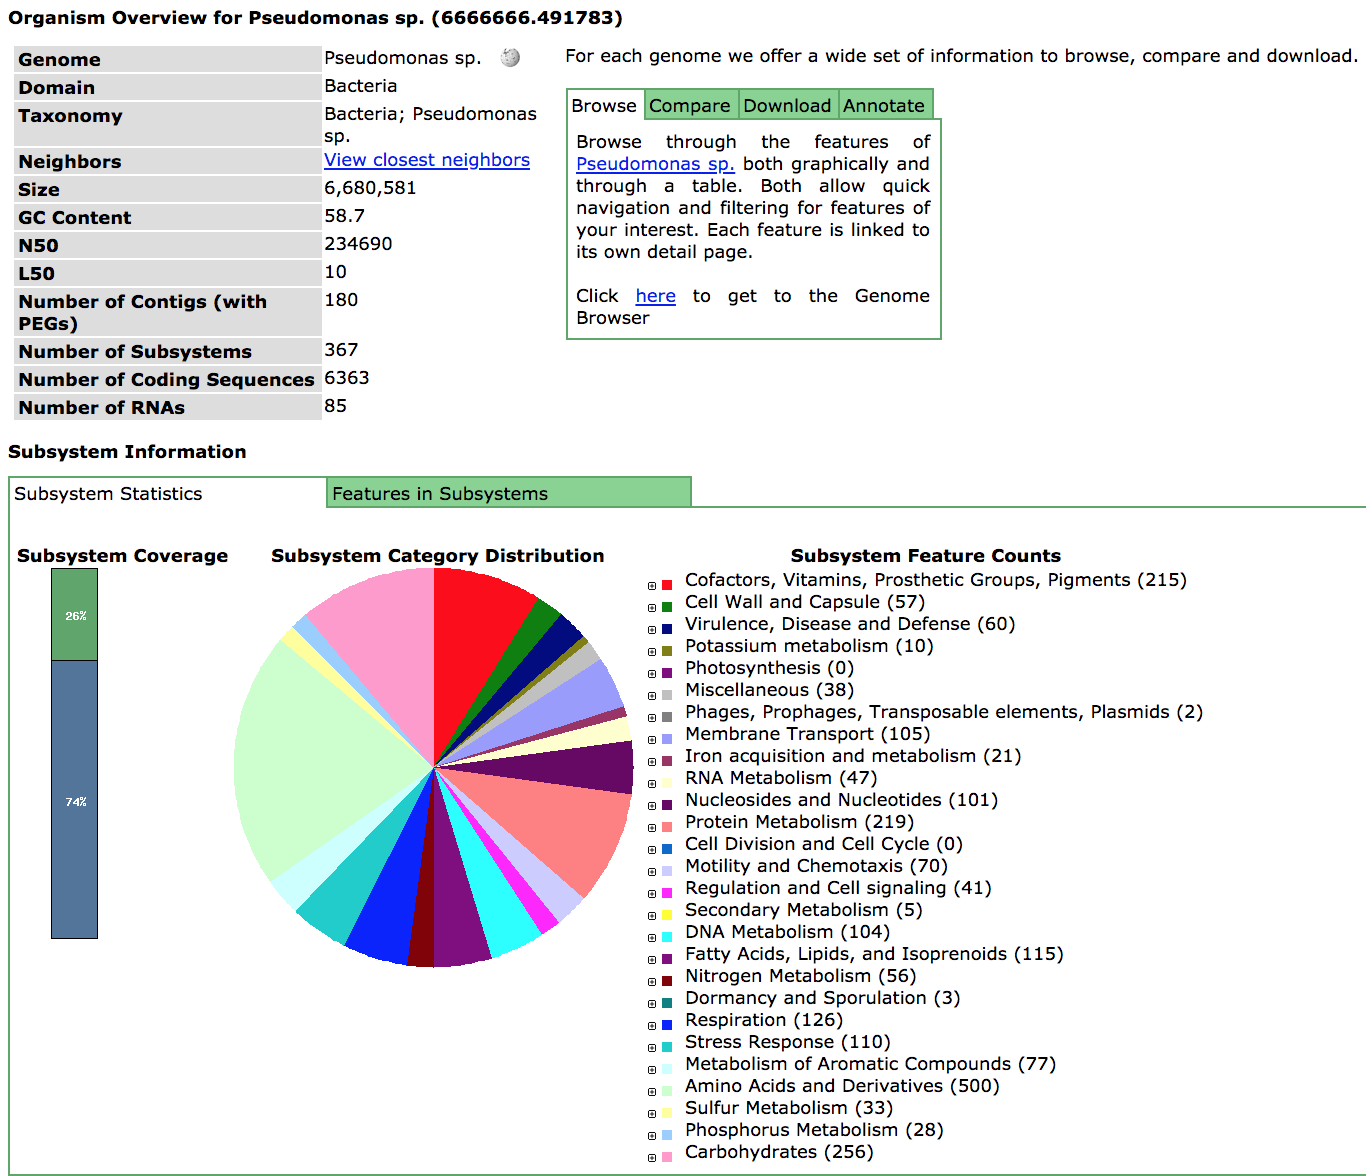

In [16]:
Image("RAST.png", width=1000, height=1000) 

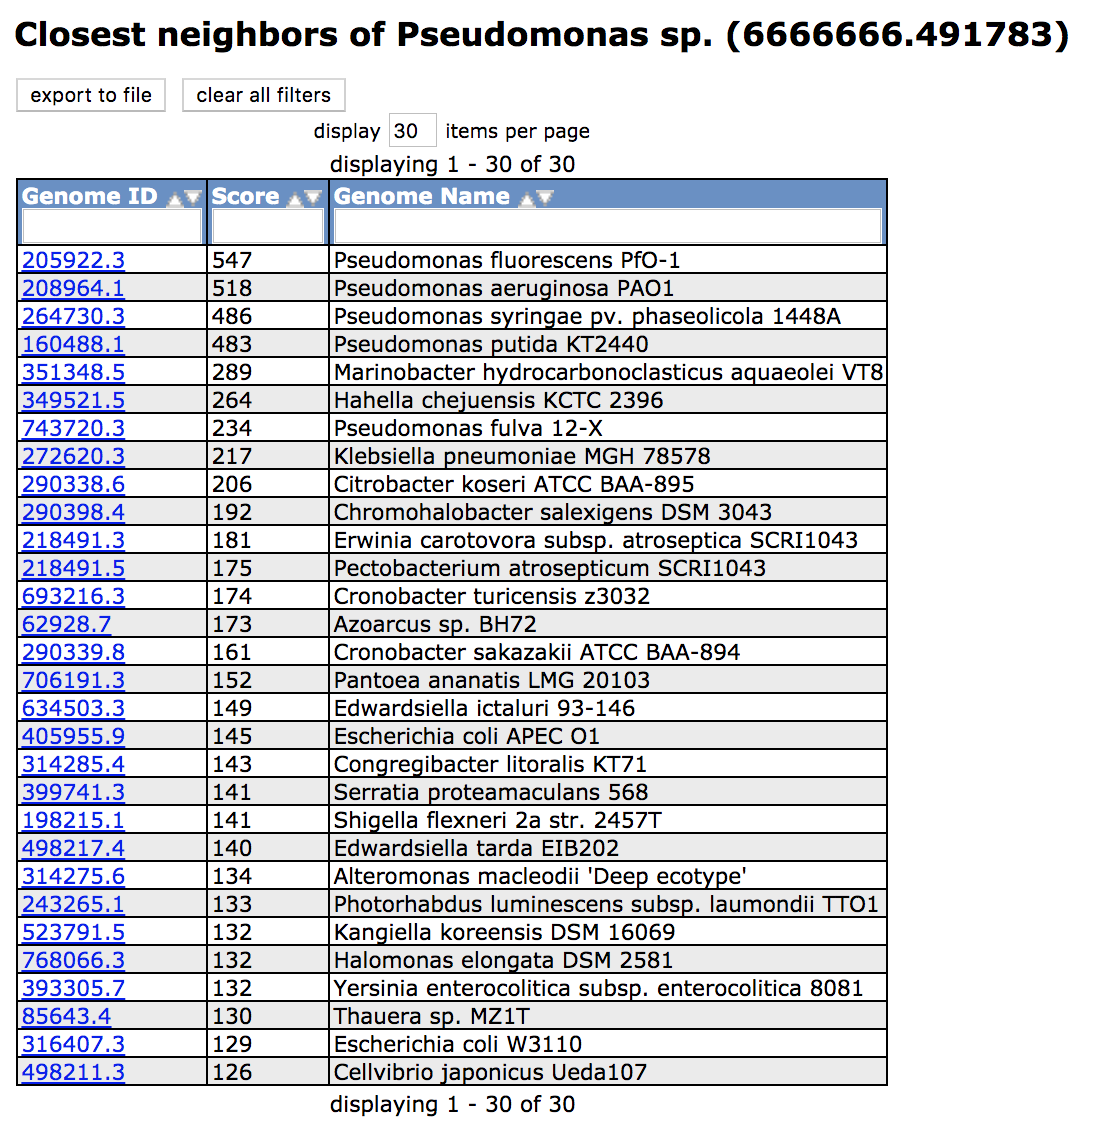

In [17]:
Image("Closest neighbors of Pseudomonas .png", width=500, height=1000) 

#### 2. Annotationing using DFAST (dfast.nig.ac.jp)
Using DFAST because I submitted on BASys yesterday but still haven't receive the result email yet. 


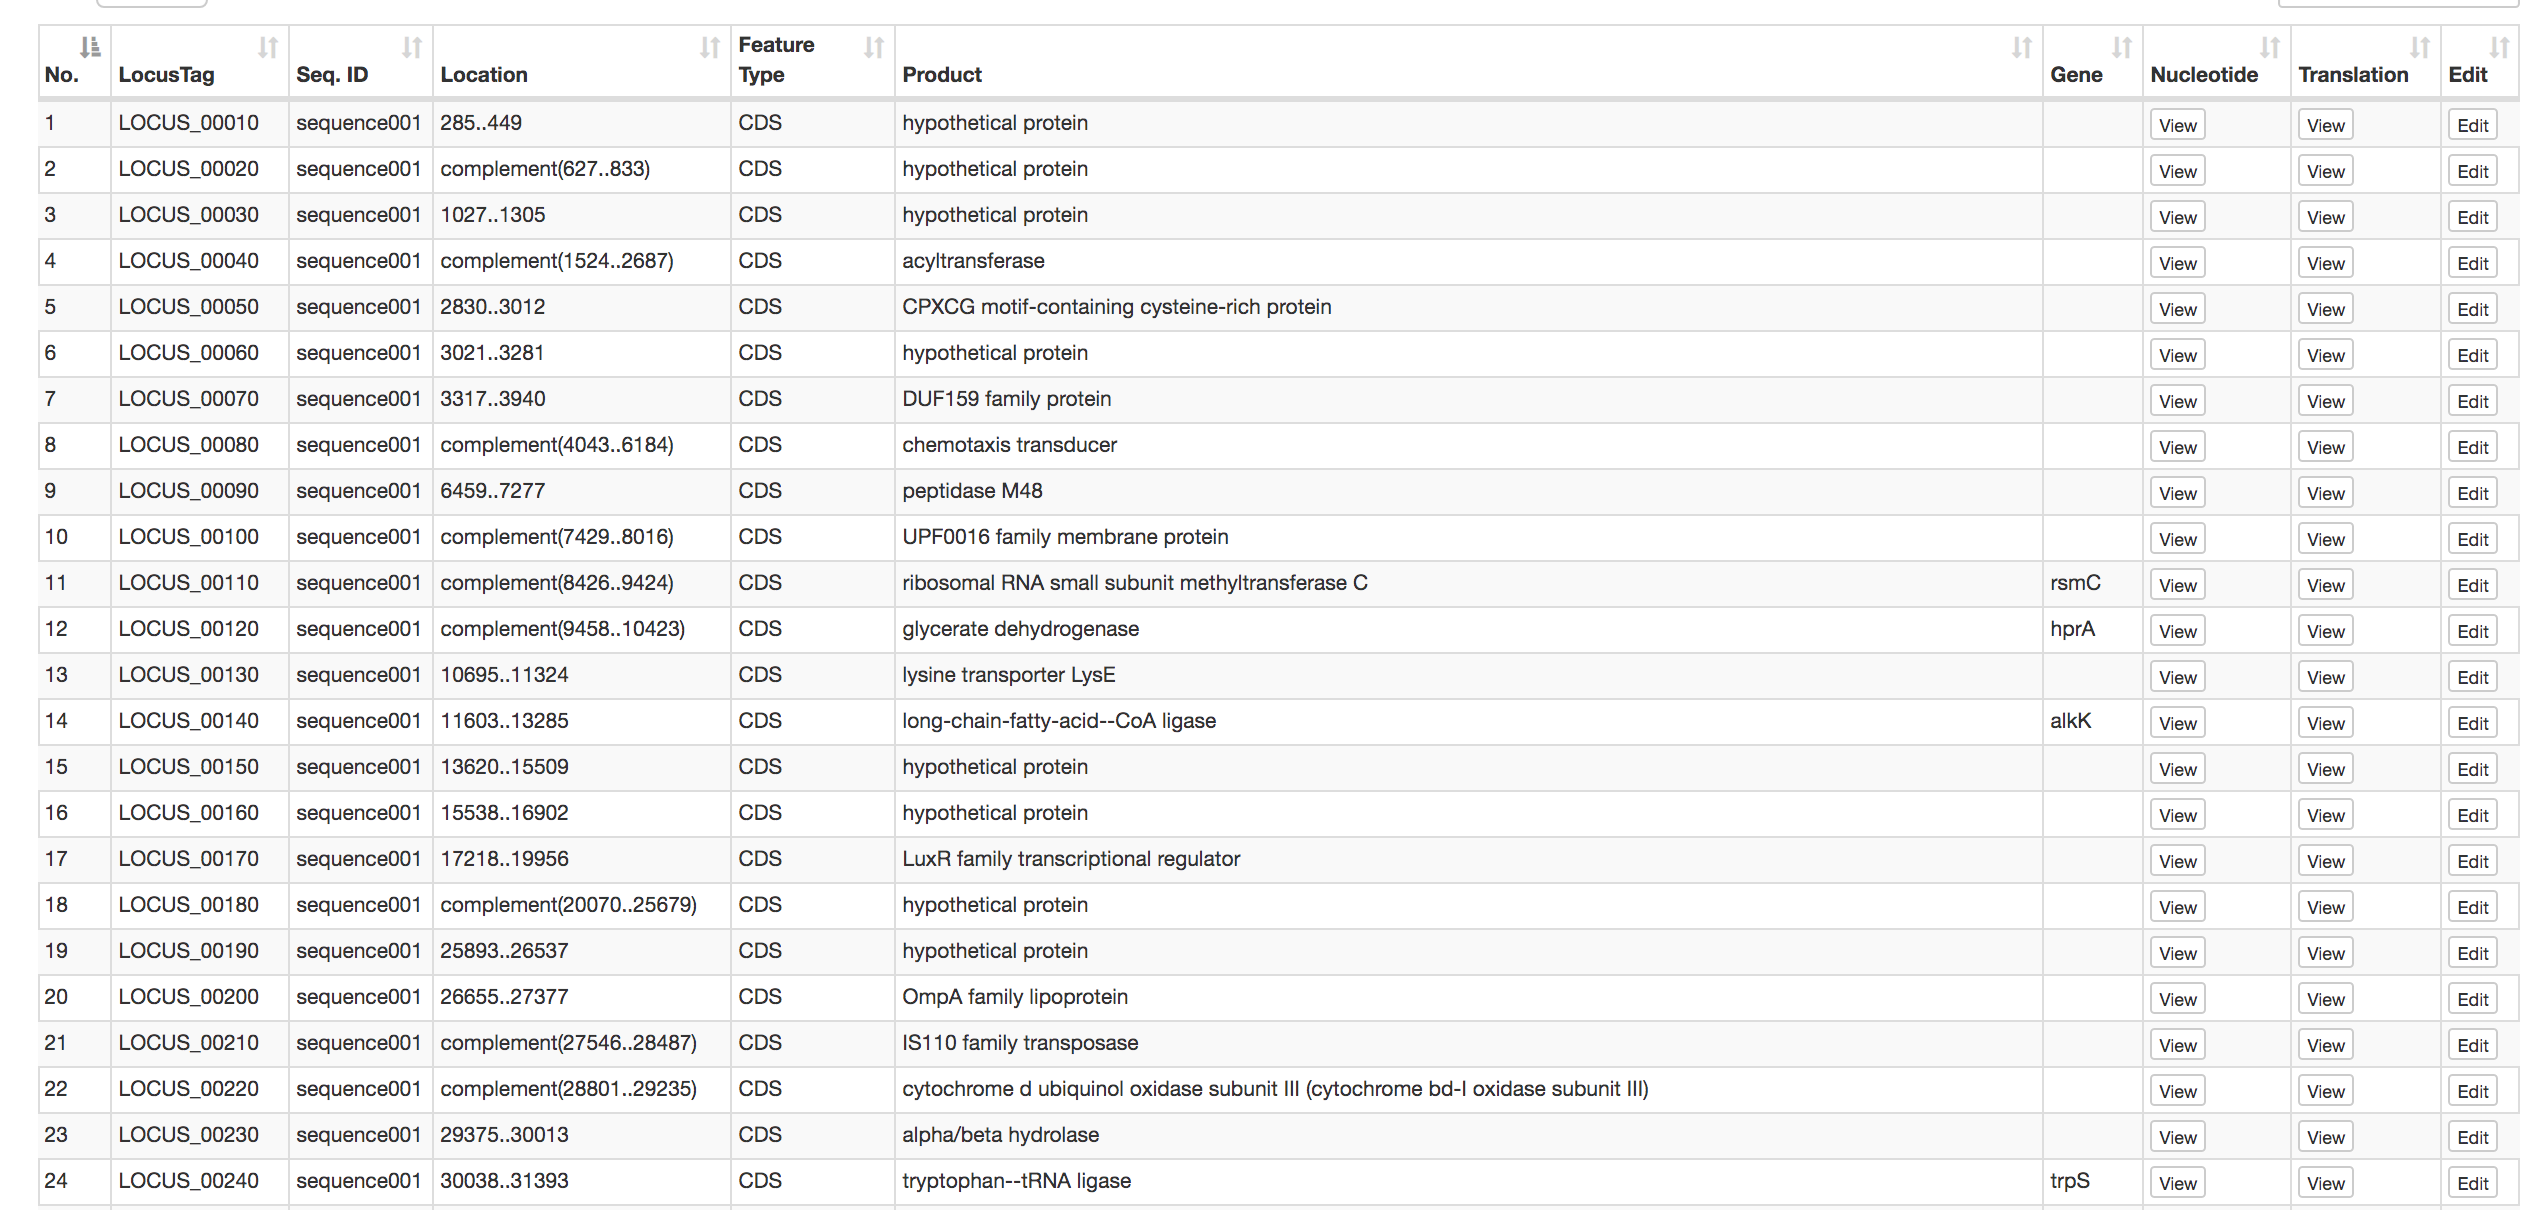

In [18]:
Image("DFAST.png", width=1000, height=1000) 

### Research Paper

**What environment do relatives of your bacterium live in? Is there evidence of adaptation to this environment in the genome?** 

The genus Pseudomonas is one of the most diverse bacterial genera. They can be found from sources ranging from plants to contaminated soil and water to human clinical samples. They usually do not cause infections in healthy individuals, but those who are already hospitalized with another illness or condition, or who are immunosuppressed. Fluctuations in variables such as organic substrates, water availability, and oxygen content on both macroscales and microscales have led to high diversity in the microbial community. Since Pseudomonas can survive in a variety of conditions in different ecosystems, they have many phenotypes depending on the various environmental conditions. 

However, the characteristics that enable microorganisms to survive and colonize the soil environment are diverse and poorly understood. According to the closest neighbor's analysis, the Pseudomonas fluorescens Pf0-1 has the highest score ranking. From a research paper, pseudomonas fluorescens are common soil bacteria that can improve plant health through nutrient cycling, pathogen antagonism and induction of plant defenses. In order to study this species, a sand column adhesion assay was developed to distinguish the adhesion abilities of a number of pseudomonads isolated from fine sandy loam. In the study, Pseudomonasfluorescens Pf0-1 which adhered to more than 90% of the total cells isolated. And it was subjected to transposon TnS insertion mutagenesis. 

Soil pseudomonads demonstrated a wide range of adhesive abilities, and the wild-type possessed poor flagella under a microscope. However, the placement of TnS into the same chromosomal site in unmutated strain Pf0-1 caused the
adhesion deficiency phenotype of Pf0-5. Through designing an assay that can screen thousands of mutants, the team was able to identify Tn5-induced chromosomal mutations in P. fluorescens caused by reduced ability to adhere to sand. This assay was used to characterize the adhesive abilities of several soil isolates and to select mutant strains whose adhesion capacity has been diminished by TnS insertional mutagenesis. However, to compensate for the decreased adhesion capacity, the TnS marker could identify and clone the genes that are responsible for flagellar synthesis. 

Since they can live in different harsh environments, I suspected that they have evolved special adaptations to survive. From a study, this ability to thrive in harsh conditions is a result of their hardy cell walls that contain porins. From the RAST analysis, I found that there are 57 counts (a reasonable big portion) for cell wall and capsules. 

In conclusion, the mutations and the hardy cell walls allow Pseudomonads Genus to survive in different ecological environments and develop into a large number of different species. 

References:  
    1.Silby, M. W., Cerdeño-Tárraga, A. M., Vernikos, G. S., Giddens, S. R., Jackson, R. W., Preston, G. M., … Thomson, N. R. (2009). Genomic and genetic analyses of diversity and plant interactions of Pseudomonas fluorescens. Genome Biology, 10(5). doi: 10.1186/gb-2009-10-5-r51  
    2.Mary F. DeFlaun, Adam S. Tanzer, Allison L. McAteer, Bonnie Marshall, Stuart B. Levy
Applied and Environmental Microbiology Jan 1990, 56 (1) 112-119